In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [4]:
def f(X,theta):
    """The linear model we are trying to fit
    
    Parameters:
    theta(np.array) = d-dimensional vector of parameters
    X (np.array) = (n,d) - dimensional data matrix
    
    Returns:
    y_pred (np.array) = n-dimensional vector of predicted targets
    """
    return X.dot(theta)

In [5]:
def mean_squared_error(theta,X,y):
    """The cost function J(tjeta0, theta1) describing the goodness of the fit
    Parameters:
    theta(np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array)? n-dimensional vector of targets    
    """
    
    return 0.5*np.mean((y-f(X,theta))**2)

In [7]:
def mse_gradient(theta, X, y):
    """The cost function, J(theta0, theta1) describing the goodness of fit
    
    Parameters:
    theta(np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array)? n-dimensional vector of targets 
    
    Returns:
    grad (np.array): d-dimensional gradient of the MSE
    """
    return np.mean((f(X,theta)-y)*X.T, axis=1)

Text(0, 0.5, 'Diabetes risk')

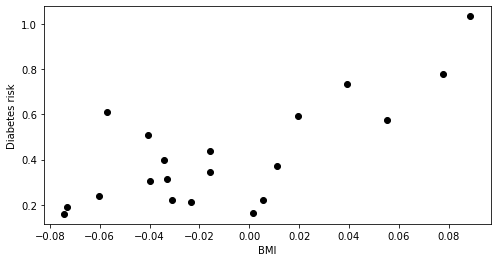

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,4]

#Load diabetes datase
X,y  = datasets.load_diabetes(return_X_y=True, as_frame = True)

#add na extra column
X['one'] = 1

#Collect 20 data points and only use bmi dimension
X_train = X[['bmi','one']].iloc[-20:]
y_train = y.iloc[-20:]/300

plt.scatter(X_train.bmi, y_train, color = 'black')
plt.xlabel('BMI')
plt.ylabel('Diabetes risk')

In [23]:
threshold = 1e-6
step_size = 4e-1
theta, theta_prev = np.array([2,1]), np.ones(2,)
opt_pts = [theta]
opt_grads = []
iter = 0

while abs(mean_squared_error(theta, X_train, y_train) - mean_squared_error(theta_prev, X_train, y_train))>threshold:
    if iter%100 ==0:
        print('Iteration %d. MSE: %.6f' % (iter, mean_squared_error(theta, X_train, y_train)))
    theta_prev = theta
    gradient = mse_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size*gradient
    opt_pts += [theta]
    opt_grads += [gradient]
    iter +=1
print('Iteration %d. MSE: %.6f' % (iter, mean_squared_error(theta, X_train, y_train)))

Iteration 0. MSE: 0.171729
Iteration 100. MSE: 0.014765
Iteration 200. MSE: 0.014349
Iteration 300. MSE: 0.013997
Iteration 400. MSE: 0.013701
Iteration 500. MSE: 0.013450
Iteration 600. MSE: 0.013238
Iteration 700. MSE: 0.013060
Iteration 800. MSE: 0.012909
Iteration 900. MSE: 0.012781
Iteration 994. MSE: 0.012680


Text(0, 0.5, 'Diabetes Risk')

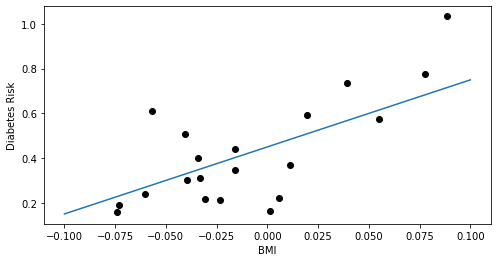

In [37]:
x_line = np.stack([np.linspace(-0.1,0.1,10), np.ones(10,)])
y_line = opt_pts[-1].dot(x_line)

#opt_pts generated two values. If you think of it as y = ax+b, one value corresponds to a and other to b
#the x_line matrix had to have a np.ones to account for the constant value of b during the dot product

plt.scatter(X_train.bmi, y_train, color = 'black')
plt.plot(x_line[0], y_line)
plt.xlabel('BMI')
plt.ylabel('Diabetes Risk')